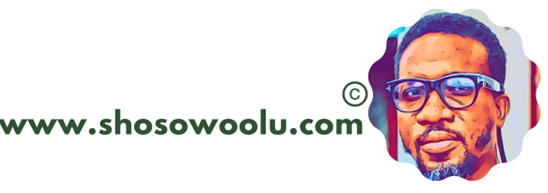

# 25 Pandas Functions You Didn't Know Existed

This notebook is a practice walkalong for the **TalkPythonToMe** Podcast titled **25 Pandas Functions You Didn't Know Existed.**

Whie listening to the podcast the Pandas API documentation is consulted for examples to demonstrate and practice the functions mentioned on the podcast which featured the author of the medium.com article - Bex Tuychiev as guest.

List of Pandas Function:

1. ExcelWriter
2. pipe
3. factorize
4. explode
5. Squeeze
6. Between
7. Transpose (T)
8. Style
9. Options
10. Convert_dtypes
11. Select_dtypes
12. Mask
13. Min and Max
14. nlargest and nsmallest
15. idxmax and idxmin
16. value_counts
17. clip
18. at_time
19. bdate_range
20. autocorr
21. hasnans
22. at and iat 
23. argsort
24. cat 
25. GroupBy.nth


Link to the podcast: https://podcasts.apple.com/gb/podcast/talk-python-to-me/id979020229?i=1000542266841 

In [1]:
import pandas as pd

## ExcelWriter

class **pandas.ExcelWriter(path, engine=None, date_format=None, datetime_format=None, mode='w', storage_options=None, if_sheet_exists=None, engine_kwargs=None)**

Class for writing DataFrame objects into excel files

### Default usage

In [2]:
df = pd.DataFrame([['ABC', 'XYZ']], columns=['Foo', 'Bar'])
df


,Foo,Bar
0,ABC,XYZ


In [3]:
with pd.ExcelWriter('data/path_to_file.xlsx') as writer:
    df.to_excel(writer)

### To write to separate sheets in a single file:

In [4]:
df1 = pd.DataFrame([['AAA', 'BBB']], columns=['Spam', 'Egg'])
df2 = pd.DataFrame([['ABC', 'XTY']], columns=['Foo', 'Bar'])
with pd.ExcelWriter('data/path_to_file1.xlsx') as writer:
    df1.to_excel(writer, sheet_name='Sheet_1')
    df2.to_excel(writer, sheet_name='Sheet_2')

### You can set the date format or datetime format:

In [5]:
from datetime import date, datetime
df = pd.DataFrame(
    [
        [date(2014, 1, 31), date(1999, 9, 24)],
        [datetime(1998, 5, 26, 23, 33, 4), datetime(2014, 2, 28, 13, 5, 13 )],
    ], 
    index=['Date', 'Datetime'], columns=['X', 'Y']
    )

with pd.ExcelWriter(
    'data/path_to_file2.xlsx', date_format='YYYY-MM-DD', datetime_format='YYYY-MM-DD HH:MM:SS') as writer:
    df.to_excel(writer)

### You can also append to an existing Excel file

In [7]:
with pd.ExcelWriter('data/path_to_file2.xlsx', mode='a', engine='openpyxl') as writer:
    df.to_excel(writer, sheet_name='Sheet_2')


### Here, the `if_sheet_exists` parameter can be set to replace a sheet if it already exists:

In [11]:
with pd.ExcelWriter(
        'data/path_to_file2.xlsx',
        mode='a',
        engine='openpyxl',
        if_sheet_exists='replace') as writer:
    df.to_excel(writer, sheet_name="Sheet1")

### You can also write multiple DataFrames to a single sheet. Note that the `if_sheet_exists` parameter needs to be set to `overlay`:

In [12]:
with pd.ExcelWriter('data/path_to_file.xlsx',
                   mode='a',
                   engine='openpyxl',
                   if_sheet_exists='overlay',
                   ) as writer:
    df1.to_excel(writer, sheet_name='Sheet1')
    df2.to_excel(writer, sheet_name='Sheet1', startcol=3)

### You can store Excel file in RAM

In [14]:
import io
df = pd.DataFrame([['ABC', 'XYZ']], columns=['Foo', 'Bar'])
buffer = io.BytesIO()
with pd.ExcelWriter(buffer) as writer:
    df.to_excel(writer)

### You can pack Excel file into zip archive:

In [19]:
import zipfile
df = pd.DataFrame([['ABC', 'XYZ']], columns=['Foo', 'Bar'])
with zipfile.ZipFile('data/file_to_path2.zip', 'w') as zf:
    with zf.open('filename.xlsx', 'w') as buffer:
        with pd.ExcelWriter(buffer) as writer:
            df.to_excel(writer)

### You can specify additional arguments to the underlying engine:

In [23]:
!pip install xlsxwriter


                                              0.0/154.8 kB ? eta -:--:--
     -------------------------------------- 154.8/154.8 kB 9.0 MB/s eta 0:00:00


In [24]:
with pd.ExcelWriter('data/path_to_file4.xlsx',
                   engine='xlsxwriter',
                   engine_kwargs={'options': {'nan_inf_to_errors': True}}
                   ) as writer:
    df.to_excel(writer)

### In append mode, `engine_kwargs` are passed through to `openpyxl’s` `load_workbook`:

In [25]:
with pd.ExcelWriter(
    'data/path_to_file5.xlsx',
    engine='openpyxl',
    engine_kwargs={'keep_vba': True}) as writer:
    df.to_excel(writer, sheet_name='Sheet2')

TypeError: Workbook.__init__() got an unexpected keyword argument 'keep_vba'

Above is a bug in Pandas 

https://github.com/pandas-dev/pandas/issues/45734

## pipe

**DataFrame.pipe(func,** ***args, \*\*kwargs)**

Apply chainable functions that expect Series or DataFrames

Parameters:

**func:** function
Function to apply to the Series/DataFrame. args, and kwargs are passed into func. Alternatively a (callable, data_keyword) tuple where data_keyword is a string indicating the keyword of callable that expects the Series/DataFrame.

**\*args:** iterable, optional

Positional arguments passed into func.

**\*\*kwargs:** mapping, optional

A dictionary of keyword arguments passed into func.

**Returns:**

the return type of func


### Example

In [28]:
import numpy as np

# Constructing a income DataFrame from a dictionary
data = [[8000, 1000], [9500, np.nan], [5000, 2000]]
df = pd.DataFrame(data, columns=['Salary', 'Others'])
df

,Salary,Others
0,8000,1000.0
1,9500,NaN
2,5000,2000.0


In [29]:
# Functions that perform tax reductions on an income DataFrame
def substract_federal_tax(df):
    return df * 0.9


def substract_state_tax(df, rate):
    return df * (1- rate)


def substract_national_insurance(df, rate, rate_increase):
    new_rate = rate + rate_increase
    return df * (1 - new_rate)

In [31]:
# instead of writing
substract_national_insurance(
    substract_state_tax(substract_federal_tax(df), rate=0.12),
    rate=0.05,
    rate_increase=0.02)

,Salary,Others
0,5892.48,736.56
1,6997.32,NaN
2,3682.80,1473.12


In [34]:
# You write
(
    df.pipe(substract_federal_tax)
    .pipe(substract_state_tax, rate=0.12)
    .pipe(substract_national_insurance, rate=0.05, rate_increase=0.02)
)

,Salary,Others
0,5892.48,736.56
1,6997.32,NaN
2,3682.80,1473.12


If you have a function that takes the data as (say) the second argument, pass a tuple indicating which keyword expects the data. For example, suppose `national_insurance` takes its data as `df` in the second argument:

In [35]:
def subtract_national_insurance(rate, df, rate_increase):
    new_rate = rate + rate_increase
    return df * (1 - new_rate)

In [36]:
(
    df.pipe(substract_federal_tax)
    .pipe(substract_state_tax, rate=0.12)
    .pipe(
        (substract_national_insurance, 'df'),
        rate=0.05,
        rate_increase=0.02)
)

,Salary,Others
0,5892.48,736.56
1,6997.32,NaN
2,3682.80,1473.12


## factorize

**pandas.factorize(values, sort=False, use_na_sentinel=True, size_hint=None)**


Encode the object as an enumerated type or categorical variable.

This method is useful for obtaining a numeric representation of an array when all that matters is identifying distinct values. factorize is available as both a top-level function `pandas.factorize()`, and as a method `Series.factorize()` and `Index.factorize()`


Parameters:
**values: sequence**

A 1-D sequence. Sequences that aren’t pandas objects are coerced to ndarrays before factorization.

**sort: bool, default False**

Sort uniques and shuffle codes to maintain the relationship.

**use_na_sentinel: bool, default True**

If True, the sentinel -1 will be used for NaN values. If False, NaN values will be encoded as non-negative integers and will not drop the NaN from the uniques of the values.

In [38]:
## Similar to OneHotEncoder in SKlearn
codes, uniques = pd.factorize(np.array(['b', 'b', 'c', 'b', 'a'], dtype='O'))


In [41]:
codes

# The results are identical for methods like `Series.factorize()`

array([0, 0, 1, 0, 2], dtype=int64)

In [40]:
uniques

array(['b', 'c', 'a'], dtype=object)

With `sort=True` the ***uniques*** will be shuffled so that the relationship is the maintained

In [42]:
codes, uniques = pd.factorize(np.array(['b', 'b', 'a', 'c', 'b'], dtype='O'),
                             sort=True)

In [43]:
codes

array([1, 1, 0, 2, 1], dtype=int64)

In [44]:
uniques



array(['a', 'b', 'c'], dtype=object)

When `use_na_sentinel=True` (the default), missing values are indicated in the ***codes*** with the sentinel value `-1` and missing values are not included in ***uniques***

In [45]:
codes, uniques = pd.factorize(np.array(['b', None, 'a', 'c', 'b'], dtype='O'))

In [46]:
codes

array([ 0, -1,  1,  2,  0], dtype=int64)

In [47]:
uniques

array(['b', 'a', 'c'], dtype=object)

List are intermally coerced to NumPy arrays. When factorizing pandas objects, the type of uniques will differ. For Categoricals, a ***Categorical*** is returned.

In [48]:
cat = pd.Categorical(['a', 'a', 'c'], categories=['a', 'b', 'c'])

codes, uniques = pd.factorize(cat)

In [49]:
codes

array([0, 0, 1], dtype=int64)

In [50]:
uniques

['a', 'c']
Categories (3, object): ['a', 'b', 'c']

Notice that `'b'` is in `uniques.categories`, despite not being present in `cat.values`

For all other pandas objects, an index of the appropriate type is returned

In [51]:
cat = pd.Series(['a', 'a', 'c'])

codes, uniques = pd.factorize(cat)

In [52]:
codes

array([0, 0, 1], dtype=int64)

In [53]:
uniques

Index(['a', 'c'], dtype='object')

If NaN is in the values, and we want to include NaN in the uniques of the values, it can be achieved by setting `use_na_sentinel=False`

In [55]:
values = np.array([1, 2, 1, np.nan])

codes, uniques = pd.factorize(values) # default:use_na_sentinel=True

codes, uniques

(array([ 0,  1,  0, -1], dtype=int64), array([1., 2.]))

In [56]:
codes, uniques = pd.factorize(values, use_na_sentinel=False)

In [57]:
codes

array([0, 1, 0, 2], dtype=int64)

In [58]:
uniques

array([ 1.,  2., nan])

## explode

**DataFrame.explode(column, ignore_index=False)**

Transform each element of a list-like to a row, replicating index values.

Parameters:<br>
**column: IndexLabel**<br>
Column(s) to explode. For multiple columns, specify a non-empty list with each element be str or tuple, and all specified columns their list-like data on same row of the frame must have matching length.

**ignore_index: bool, default False**<br>
If True, the resulting index will be labeled 0, 1, …, n - 1.

Returns:<br>
**DataFrame**
Exploded lists to rows of the subset columns; index will be duplicated for these rows.

Raises:<br>
**ValueError**<br>
-If columns of the frame are not unique.

-If specified columns to explode is empty list.

-If specified columns to explode have not matching count of elements rowwise in the frame.

In [60]:
# Create a DataFrame
df = pd.DataFrame({'A': [[0, 1, 2], 'foo', [], [3, 4]],
                  'B': 1,
                  'C': [['a', 'b', 'c'], np.nan, [], ['d', 'e']]})

df

,A,B,C
0,"[0, 1, 2]",1,"[a, b, c]"
1,foo,1,NaN
2,[],1,[]
3,"[3, 4]",1,"[d, e]"


Single-column explode

In [61]:
df.explode('A')

,A,B,C
0,0,1,"[a, b, c]"
0,1,1,"[a, b, c]"
0,2,1,"[a, b, c]"
1,foo,1,NaN
2,NaN,1,[]
3,3,1,"[d, e]"
3,4,1,"[d, e]"


Multi-column explode

In [62]:
df.explode(list('AC'))

,A,B,C
0,0,1,a
0,1,1,b
0,2,1,c
1,foo,1,NaN
2,NaN,1,NaN
3,3,1,d
3,4,1,e


## squeeze

**DataFrame.squeeze(axis=None)**

Squeeze 1 dimensional axis objects into scalars.

Series or DataFrames with a single element are squeezed to a scalar. DataFrames with a single column or a single row are squeezed to a Series. Otherwise the object is unchanged.

This method is most useful when you don’t know if your object is a Series or DataFrame, but you do know it has just a single column. In that case you can safely call squeeze to ensure you have a Series.

Parameters:<br>
**axis:{0 or ‘index’, 1 or ‘columns’, None}, default None<br>**
A specific axis to squeeze. By default, all length-1 axes are squeezed. For Series this parameter is unused and defaults to None.

Returns:<br>
**DataFrame, Series, or scalar<br>**
The projection after squeezing axis or all the axes.

In [63]:
primes = pd.Series([2, 3, 5, 7])

In [64]:
even_primes = primes[primes % 2 == 0]

In [65]:
even_primes

0    2
dtype: int64

In [66]:
type(even_primes)

pandas.core.series.Series

In [67]:
even_primes.squeeze()

2

Squeezing objects with more than one value in every axis does nothing

In [70]:
odd_primes = primes[primes % 2 == 1]

In [71]:
odd_primes

1    3
2    5
3    7
dtype: int64

In [72]:
odd_primes.squeeze()

1    3
2    5
3    7
dtype: int64

Squeezing is even more effective when used with DataFrames

In [73]:
df = pd.DataFrame([[1, 2], [3, 4]], columns=['a', 'b'])
df

,a,b
0,1,2
1,3,4


In [74]:
# Slicing a single column will produce a DataFrame with columns having only one value
df_a = df[['a']]
df_a

,a
0,1
1,3


In [75]:
type(df_a)

pandas.core.frame.DataFrame

In [78]:
# So the column can be squeezed down, resulting in a Series
df_s = df_a.squeeze()
type(df_s)

pandas.core.series.Series

In [79]:
df_s

0    1
1    3
Name: a, dtype: int64

In [80]:
# Slicing a single row from the single column will produce a single scalar DataFrame
df_0a = df.loc[df.index < 1, ['a']]
df_0a

,a
0,1


In [82]:
# Squeezing the rows produces a sihgle scalar Series
df_0a.squeeze('rows')

a    1
Name: 0, dtype: int64

In [ ]:
# Squeezing all azes will